In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By # 셀레니움 4.0부터 포함된 함수(필수)

## 크롤링 - 구글 뉴스

In [2]:
driver = webdriver.Chrome('./driver/chromedirver.exe')

C:\Users\thddu\AppData\Local\Temp\ipykernel_88\623223277.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./driver/chromedirver.exe')


In [3]:
# 웹사이트
driver.get('https://news.google.com/home?hl=ko&gl=KR&ceid=KR:ko')
driver.implicitly_wait(10) # 10초 대기

In [4]:
# 검색창 선택 후 선택
search = driver.find_element(By.CSS_SELECTOR,'#gb > div.gb_Bd.gb_Rd.gb_Id > div.gb_Ad.gb_Ld.gb_we.gb_te.gb_ze > div.gb_ve > form > div.gb_jf > div > div > div > div > div.d1dlne > input.Ax4B8.ZAGvjd')
search.click()

In [5]:
# 검색어 입력
search.send_keys('콘솔게임 시장전망')

In [6]:
# 엔터키 전송
search.send_keys(Keys.ENTER)

기사 내용 전체 가져오기 실험중

In [257]:
news = driver.find_elements(By.CSS_SELECTOR,'#yDmH0d > c-wiz > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div > div > article')
news
news[0].find_element(By.CSS_SELECTOR,'a').get_attribute('href')

#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(1) > div > article > a

'https://news.google.com/articles/CBMiMWh0dHBzOi8vd3d3LmFzaWF0aW1lLmNvLmtyL2FydGljbGUvMjAyMzA1MTE1MDAyNzHSAQA?hl=ko&gl=KR&ceid=KR%3Ako'

In [259]:
# 첫번쨰 기사 페이지로 이동
news_1 = news[0].find_element(By.CSS_SELECTOR,'a').get_attribute('href')
# news_1.click()
driver.get(news_1)

In [270]:
contents = driver.find_elements(By.CSS_SELECTOR,'body > div > div.list_contents_container.article_container_layout > div.section_left_container > div > div.row.article_txt_container > div > p')
contents[21].text

# body > div:nth-child(10) > div.list_contents_container.article_container_layout > div.section_left_container > div > div.row.article_txt_container > div > p:nth-child(9)
# body > div:nth-child(10) > div.list_contents_container.article_container_layout > div.section_left_container > div > div.row.article_txt_container > div > p:nth-child(31)

"이런 기회를 포착하기 위해, 국내 게임사에서는 11일부터 오는 14일까지 고양시 킨텍스에서 '수도권 최대 게임쇼'로 불리는 플레이엑스포를 개최한다. 그라비티는 이 행사에 타이틀 14종을 출품하고 부스에서 시연을 진행한다. 카카오게임즈는 '이터널 리턴'을 단독 부스 형태로 출품해 참가하며 스마일게이트는 오는 19일과 30일, 그리고 6월 이후 출시 예정인 다양한 작품을 플레이엑스포를 통해 선공개한다."

# 뉴스기사 제목 추출 - 시행착오 

In [237]:
# 뉴스기사 제목 추출 - 시행착오 
news = driver.find_elements(By.CSS_SELECTOR,'div.lBwEZb.BL5WZb.GndZbb')
news[0].text

'대세 꿈꾸는 \'콘솔\'… 대작 기대에도 갈 길 멀다\n어제\n주간현대\n[주간현대] 연간 수출 10조 원…세계로 뻗는 K-게임\n1시간 전\n위메이드, 마이크로소프트와 함께 콘솔 게임시장 두드린다\n4일 전\nZD넷 코리아\n[이기자의 게임픽] 엔씨소프트 TL, 하반기 새 성장동력되나\n5시간 전\n"북미 시장 노크"…\'TL\'·\'나이트크로우\' 통할까[K-게임 세계로②]\n4월 29일\n더벨(thebell)\n국내 최고 자본시장(Capital Markets) 미디어\n2일 전\n비트코인 급등하는데 게임사 코인 한달새 60% 넘게 급락 - 조선비즈\n어제\n가입자 100만명 모은다더니… 통신 3사 계륵된 클라우드 게임 - 조선비즈\n3일 전\n파이에듀뉴스\n글로벌 게임 내 광고 시장 – 성장, 동향, COVID-19 영향 및 예측(2023 ...\n21시간 전\n\'올 하반기 개발 목표\' 펄어비스 韓 콘솔 국가대표 \'붉은사막\' 총력전\n어제\n코로나 기간 반려동물 시장 규모 급성장... 40대 여성이 큰손\n9일 전\n크래프톤 1Q 영업익 2830억, 시장 전망 \'깜짝\' 상회\n3일 전\n게임업계 3N-SK2 지각변동… 신작·글로벌이 실적 희비 갈랐다 - 조선비즈\n51분 전\n크래프톤, 무난하게 컨센서스 부합 전망…”모바일게임 실적 견인”\n4월 21일\nEBN뉴스센터\n판 커지는 \'클라우드 게임\'…MS·블리자드 100조원 \'빅딜\' 발목\n9일 전\n뷰어스\n적자 아니면 뒷걸음질…중견게임사, ‘신작’으로 부진 탈출 기대\n3시간 전\n한겨레\n마이크로소프트-액티비전 합병, 영국에서 가로막혔다\n4월 27일\n게임업계, 1분기 부진한 성적표에 \'울상\'...실적 개선 \'안간힘\'\n어제\n비즈워치\n위메이드 4분기 연속 적자…2분기 반전 노린다\n3일 전\n디지털타임스\n[윤선영의 겜성월드] P2E·대형신작 장전완료… 이젠 글로벌로\n10일 전\n파이에듀뉴스\n글로벌 게임 콘솔 시장: 경쟁 역학 및 글로벌 전망 2030 – 파이에듀뉴

In [185]:
# 뉴스기사 제목 추출 - 시행착오
news[0].find_element(By.CSS_SELECTOR,'h3').text

"대세 꿈꾸는 '콘솔'… 대작 기대에도 갈 길 멀다"

In [180]:
# 뉴스기사 제목 추출 
news = driver.find_elements(By.CSS_SELECTOR,'c-wiz')
news
#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(1) > div > article > a

#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(2) > div > article > a

[<selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_74")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_75")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_76")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_77")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14e36", element="1AA04A93995C20DC1AFB96235336D592_element_78")>,
 <selenium.webdriver.remote.webelement.WebElement (session="cd63636b1e73477be3e2a721bdd14

# 뉴스기사 제목 추출 시작

In [7]:
# 뉴스기사 제목 추출 
news = driver.find_elements(By.CSS_SELECTOR,'#yDmH0d > c-wiz > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div > div > article')
news
#news[2].find_element(By.CSS_SELECTOR,'h3').text
#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(1) > div > article > a

#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(1) > div > article > div.wsLqz.RD0gLb

#yDmH0d > c-wiz:nth-child(25) > div > div.FVeGwb.CVnAc.Haq2Hf.bWfURe > div.ajwQHc.BL5WZb.RELBvb > div > main > c-wiz > div.lBwEZb.BL5WZb.GndZbb > div:nth-child(1) > div > article > h3

[<selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_57")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_58")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_59")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_60")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_61")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c0dc1", element="690E9F8BBF80AC3E180D0BF7178E152A_element_62")>,
 <selenium.webdriver.remote.webelement.WebElement (session="82c4cf726fc476f449d06850576c

In [8]:
news_title=[]
for i in news:
    news_title.append(i.find_element(By.CSS_SELECTOR,'h3').text)
    
news_title[3]

'위메이드, 마이크로소프트와 함께 콘솔 게임시장 두드린다'

In [9]:
news_df = pd.DataFrame({'제목':news_title})
news_df

,제목
0,[생활TECH] ‘5년 후 450조 시장’…게임의 역사는 어디까지 왔나
1,대세 꿈꾸는 '콘솔'… 대작 기대에도 갈 길 멀다
2,[주간현대] 연간 수출 10조 원…세계로 뻗는 K-게임
3,"위메이드, 마이크로소프트와 함께 콘솔 게임시장 두드린다"
4,코로나 기간 반려동물 시장 규모 급성장... 40대 여성이 큰손
...,...
95,"게임산업 10대 트렌드 “빅테크M&A, 플랫폼 다양화”"
96,"침체된 PC 게임 시장, 2025년까지 단계적 회복 전망"
97,커지는 중동 게임시장…K게임도 주목
98,"MS, 블리자드 인수 난항…EU도 반대 분위기↑"


In [56]:
# html파싱-------------------------------------------------------------
# 지수님 코드 공부
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
# 헤드라인이 들어있는 부분 
results = soup.find_all('h3', class_='ipQwMb')
results[0].text

'비트코인 급등하는데 게임사 코인 한달새 60% 넘게 급락 - 조선비즈'

In [79]:
results[20].text

'“네오위즈, 기업가치 우상향 전망에 목표가 올려”-키움'

In [137]:
results

[<h3 class="ipQwMb ekueJc RD0gLb"><a class="DY5T1d RZIKme" href="./articles/CBMiS2h0dHBzOi8vYml6LmNob3N1bi5jb20vc3RvY2svZmluYW5jZS8yMDIzLzA1LzExL0dMS0tWNEZaTFJGVkhNMkZFSEQyWUQzRFVNL9IBWmh0dHBzOi8vYml6LmNob3N1bi5jb20vc3RvY2svZmluYW5jZS8yMDIzLzA1LzExL0dMS0tWNEZaTFJGVkhNMkZFSEQyWUQzRFVNLz9vdXRwdXRUeXBlPWFtcA?hl=ko&amp;gl=KR&amp;ceid=KR%3Ako" target="_blank">비트코인 급등하는데 게임사 코인 한달새 60% 넘게 급락 - 조선비즈</a></h3>,
 <h3 class="ipQwMb ekueJc RD0gLb"><a class="DY5T1d RZIKme" href="./articles/CBMiK2h0dHBzOi8vemRuZXQuY28ua3Ivdmlldy8_bm89MjAyMzA1MTIxMDI0MjjSAQA?hl=ko&amp;gl=KR&amp;ceid=KR%3Ako" target="_blank">[이기자의 게임픽] 엔씨소프트 TL, 하반기 새 성장동력되나</a></h3>,
 <h3 class="ipQwMb ekueJc RD0gLb"><a class="DY5T1d RZIKme" href="./articles/CBMiOmh0dHA6Ly93d3cuc2lzYXdlZWsuY29tL25ld3MvYXJ0aWNsZVZpZXcuaHRtbD9pZHhubz0yMDQ3MzjSAT1odHRwOi8vd3d3LnNpc2F3ZWVrLmNvbS9uZXdzL2FydGljbGVWaWV3QW1wLmh0bWw_aWR4bm89MjA0NzM4?hl=ko&amp;gl=KR&amp;ceid=KR%3Ako" target="_blank">1분기 성적표 내놓은 게임업계… ‘신작’으로 2분기 반등할까</a></h3>,
 <h3 class="ipQwM

In [10]:
driver.close()

## 워드크라우드

In [11]:
news_df

,제목
0,[생활TECH] ‘5년 후 450조 시장’…게임의 역사는 어디까지 왔나
1,대세 꿈꾸는 '콘솔'… 대작 기대에도 갈 길 멀다
2,[주간현대] 연간 수출 10조 원…세계로 뻗는 K-게임
3,"위메이드, 마이크로소프트와 함께 콘솔 게임시장 두드린다"
4,코로나 기간 반려동물 시장 규모 급성장... 40대 여성이 큰손
...,...
95,"게임산업 10대 트렌드 “빅테크M&A, 플랫폼 다양화”"
96,"침체된 PC 게임 시장, 2025년까지 단계적 회복 전망"
97,커지는 중동 게임시장…K게임도 주목
98,"MS, 블리자드 인수 난항…EU도 반대 분위기↑"


In [12]:
news_df['제목'].to_string()

'0               [생활TECH] ‘5년 후 450조 시장’…게임의 역사는 어디까지 왔나\n1                           대세 꿈꾸는 \'콘솔\'… 대작 기대에도 갈 길 멀다\n2                        [주간현대] 연간 수출 10조 원…세계로 뻗는 K-게임\n3                        위메이드, 마이크로소프트와 함께 콘솔 게임시장 두드린다\n4                   코로나 기간 반려동물 시장 규모 급성장... 40대 여성이 큰손\n5                   크래프톤, 무난하게 컨센서스 부합 전망…”모바일게임 실적 견인”\n6             가입자 100만명 모은다더니… 통신 3사 계륵된 클라우드 게임 - 조선비즈\n7                           마이크로소프트-액티비전 합병, 영국에서 가로막혔다\n8                 판 커지는 \'클라우드 게임\'…MS·블리자드 100조원 \'빅딜\' 발목\n9                      크래프톤 1Q 영업익 2830억, 시장 전망 \'깜짝\' 상회\n10               비트코인 급등하는데 게임사 코인 한달새 60% 넘게 급락 - 조선비즈\n11                    [이기자의 게임픽] 엔씨소프트 TL, 하반기 새 성장동력되나\n12                    콘솔 시장 1분기 동향, \'천하삼분지계\' 속 \'PS5\' 독주\n13              "북미 시장 노크"…\'TL\'·\'나이트크로우\' 통할까[K-게임 세계로②]\n14                   [윤선영의 겜성월드] P2E·대형신작 장전완료… 이젠 글로벌로\n15              \'올 하반기 개발 목표\' 펄어비스 韓 콘솔 국가대표 \'붉은사막\' 총력전\n16                      국내 최고 자본시장(Capital Markets) 미디어\n17        

In [13]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(news_df['제목'].to_string())
count = Counter(nouns)
count

Counter({'생활': 1,
         '후': 1,
         '시장': 37,
         '게임': 74,
         '역사': 1,
         '어디': 1,
         '대세': 3,
         '콘솔': 32,
         '대작': 2,
         '기대': 2,
         '길': 1,
         '주간': 1,
         '현대': 1,
         '연간': 1,
         '수출': 2,
         '원': 2,
         '세계': 4,
         '위메이드': 3,
         '마이크로소프트': 2,
         '코로나': 4,
         '기간': 1,
         '반려동물': 2,
         '규모': 4,
         '급성': 1,
         '여성': 1,
         '큰손': 1,
         '크래프톤': 2,
         '무난': 1,
         '컨센서스': 1,
         '부합': 1,
         '전망': 7,
         '모바일': 8,
         '실적': 3,
         '견인': 1,
         '가입자': 1,
         '통신': 1,
         '사': 10,
         '계륵': 1,
         '클라우드': 3,
         '조선': 5,
         '비즈': 5,
         '액티비전': 1,
         '합병': 1,
         '영국': 1,
         '판': 1,
         '블리자드': 3,
         '빅딜': 1,
         '발목': 1,
         '영업': 1,
         '익': 1,
         '깜짝': 1,
         '상회': 1,
         '비트코인': 2,
         '급등': 2,
      

In [14]:
# 워드 클라우드 라이브러리 호출
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import platform

# 워드 클라우드에 필요한 글꼴 지정
if platform.system() == 'Windows':   #윈도우의    경우 
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

(-0.5, 799.5, 399.5, -0.5)

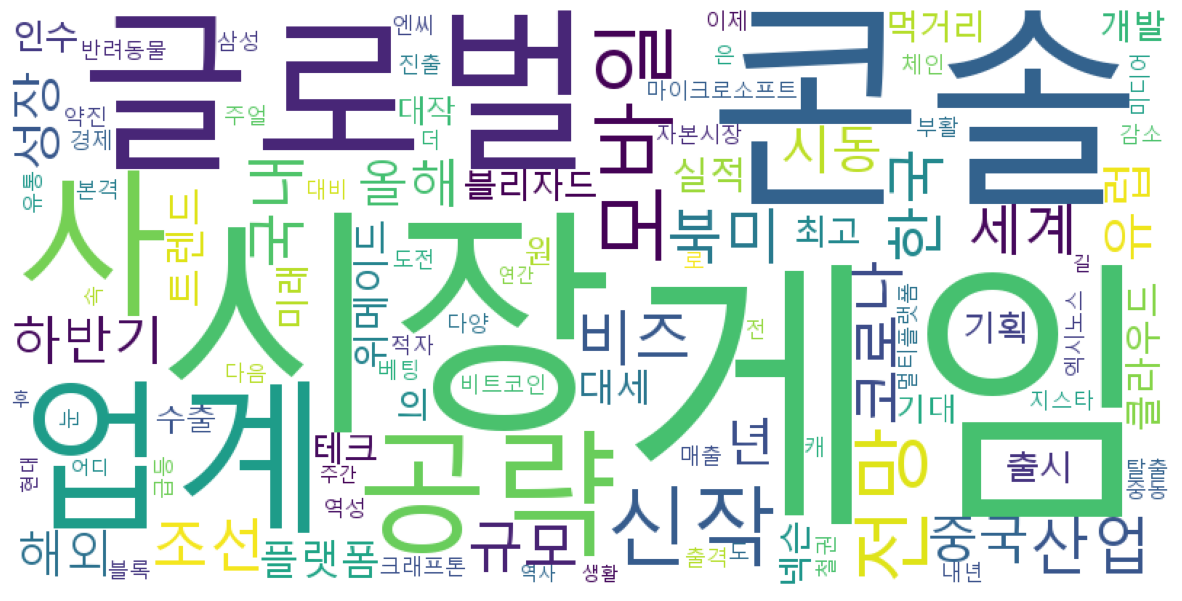

In [15]:
#워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path,
                    background_color="white",  
                    max_words=100, 
                    relative_scaling= 0.3, 
                    width = 800,
                    height = 400
                   ).generate_from_frequencies(count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

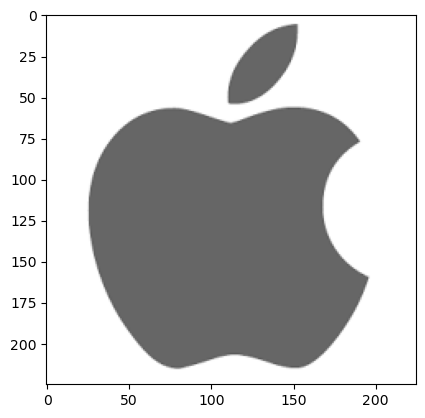

In [16]:
from PIL import Image

icon = Image.open('./data/apple.png').convert("RGBA")    # 마스크가 될 이미지 불러오기 
plt.imshow(icon)

mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [17]:
import PIL
icon = PIL.Image.open('./data/cloud.png').convert("RGBA")

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)
img = np.array(img)

(-0.5, 1279.5, 715.5, -0.5)

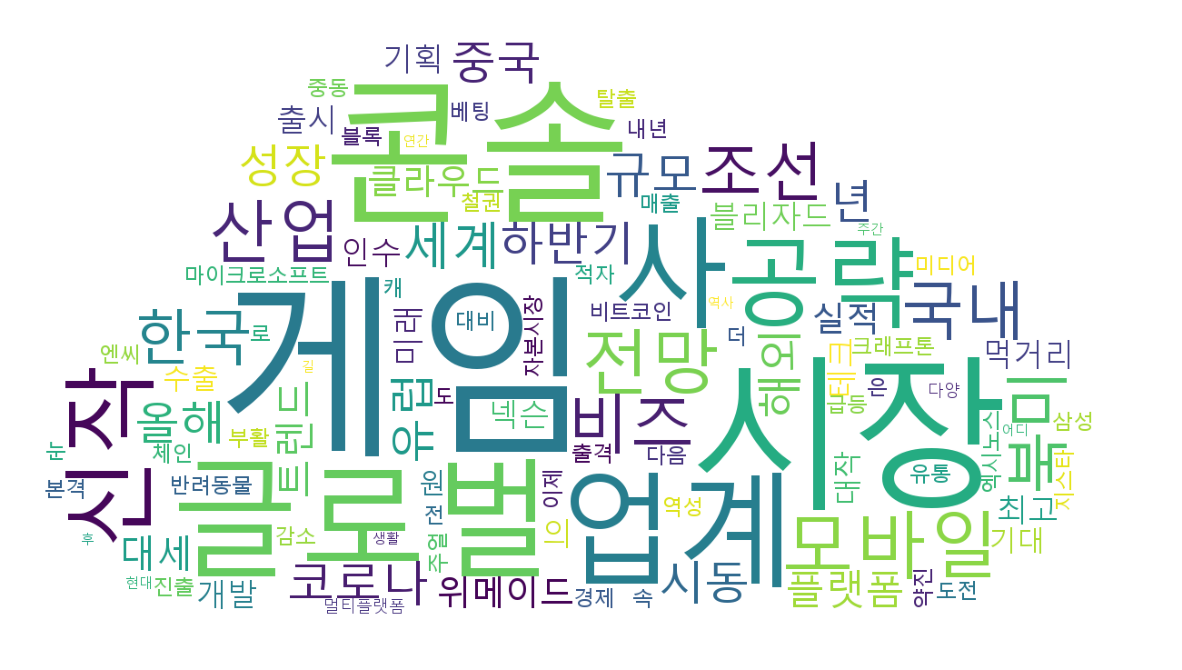

In [18]:
#워드 클라우드 만들기
wordcloud=WordCloud(font_path= font_path, background_color="white",  
                    max_words=100, relative_scaling= 0.3, 
                    width = 800, height = 400, mask=img
                   ).generate_from_frequencies(count)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')

# - 불용어 제거 

In [19]:
from konlpy.tag import Okt
from collections import Counter

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(news_df['제목'].to_string())
count = Counter(nouns)
count

Counter({'생활': 1,
         '후': 1,
         '시장': 37,
         '게임': 74,
         '역사': 1,
         '어디': 1,
         '대세': 3,
         '콘솔': 32,
         '대작': 2,
         '기대': 2,
         '길': 1,
         '주간': 1,
         '현대': 1,
         '연간': 1,
         '수출': 2,
         '원': 2,
         '세계': 4,
         '위메이드': 3,
         '마이크로소프트': 2,
         '코로나': 4,
         '기간': 1,
         '반려동물': 2,
         '규모': 4,
         '급성': 1,
         '여성': 1,
         '큰손': 1,
         '크래프톤': 2,
         '무난': 1,
         '컨센서스': 1,
         '부합': 1,
         '전망': 7,
         '모바일': 8,
         '실적': 3,
         '견인': 1,
         '가입자': 1,
         '통신': 1,
         '사': 10,
         '계륵': 1,
         '클라우드': 3,
         '조선': 5,
         '비즈': 5,
         '액티비전': 1,
         '합병': 1,
         '영국': 1,
         '판': 1,
         '블리자드': 3,
         '빅딜': 1,
         '발목': 1,
         '영업': 1,
         '익': 1,
         '깜짝': 1,
         '상회': 1,
         '비트코인': 2,
         '급등': 2,
      

In [28]:
count.most_common

<bound method Counter.most_common of Counter({'게임': 74, '시장': 37, '콘솔': 32, '글로벌': 13, '업계': 11, '사': 10, '공략': 10, '신작': 9, '모바일': 8, '전망': 7, '산업': 6, '조선': 5, '비즈': 5, '북미': 5, '국내': 5, '한국': 5, '세계': 4, '코로나': 4, '규모': 4, '하반기': 4, '성장': 4, '올해': 4, '중국': 4, '시동': 4, '년': 4, '유럽': 4, '해외': 4, '플랫폼': 4, '트렌드': 4, '대세': 3, '위메이드': 3, '실적': 3, '클라우드': 3, '블리자드': 3, '개발': 3, '최고': 3, '의': 3, '인수': 3, '넥슨': 3, '출시': 3, '미래': 3, '먹거리': 3, '기획': 3, '테크': 3, '대작': 2, '기대': 2, '수출': 2, '원': 2, '마이크로소프트': 2, '반려동물': 2, '크래프톤': 2, '비트코인': 2, '급등': 2, '속': 2, '자본시장': 2, '미디어': 2, '캐': 2, '주얼': 2, '적자': 2, '약진': 2, '눈': 2, '베팅': 2, '탈출': 2, '더': 2, '이제': 2, '진출': 2, '매출': 2, '감소': 2, '부활': 2, '엔씨': 2, '경제': 2, '대비': 2, '역성': 2, '내년': 2, '로': 2, '삼성': 2, '엑시노스': 2, '다음': 2, '본격': 2, '중동': 2, '지스타': 2, '은': 2, '전': 2, '출격': 2, '도전': 2, '유통': 2, '도': 2, '블록': 2, '체인': 2, '철권': 2, '멀티플랫폼': 2, '다양': 2, '생활': 1, '후': 1, '역사': 1, '어디': 1, '길': 1, '주간': 1, '현대': 1, '연간': 1, '기간': 1, '급성': 1, '여성': 1, '

In [30]:
for c in count:
    if len(c)>=2:
        print(c)

생활
시장
게임
역사
어디
대세
콘솔
대작
기대
주간
현대
연간
수출
세계
위메이드
마이크로소프트
코로나
기간
반려동물
규모
급성
여성
큰손
크래프톤
무난
컨센서스
부합
전망
모바일
실적
견인
가입자
통신
계륵
클라우드
조선
비즈
액티비전
합병
영국
블리자드
빅딜
발목
영업
깜짝
상회
비트코인
급등
코인
달새
급락
이기자
엔씨소프트
하반기
성장동력
동향
천하
삼분
지계
독주
북미
노크
나이트
크로우
윤선
월드
대형
신작
장전
완료
글로벌
개발
목표
어비스
국가대표
사막
총력전
국내
최고
자본시장
미디어
새해
한국
전성기
맞이
튀르키예
성장
하이퍼
주얼
주도
연속
적자
반전
근소
우위
약진
올해
판도
공정위
인수
승인
결정
업계
성적표
울상
개선
안간힘
유망
장애물
산더미
미네르바
스포츠
산업
강국
중국
우리
앵그리버드
제작사
기업
베팅
뒷걸음질
중견
부진
탈출
네오위즈
브라운
스트
도약
시동
과금
온라인게임
이제
진출
활기
인기
통치
체질개선
시급
넥슨
분기
매출
신기록
쌍끌이
달러
감소
가뭄
먹구름
전환
부활
레트로
열풍
맹주
댕댕
가족
성향
엔씨
서구
성과
출시
서울
경제
대비
역성
셧다운
영향
돌파
정면
충돌
레전드
오브
이미르
연말
내년
러시
수익
유럽
조준
삼성
엑시노스
그래픽
성능
다음
본격
공략
마니아
빈살
하락
왕실
금고
다이브
중동
안녕
추억
이유
해외
미래
먹거리
지스타
전쟁
불씨
디마
독립
축구
호황
누리
발열
논란
협력
출격
신년
기획
도전
영토
닌텐도
유통
대원미디어
디아블로
서비스
지각
변동
예고
수도권
분양
아파트
쇄도
메타
버스
블록
체인
플랫폼
상용
가속
정체
고공
긍정
주요
서브컬처
플레이
엑스포
철권
장인
하라
시리즈
봇물
창간
위상
장착
부각
규제
엎친
역대
특징
이브이
첨단
소재
테크
이슈
드라마
거짓
부터
남성
결혼
선택
린다
분주
직격
설문
열쇠
독일
게임스컴
대거
음악
훌쩍
걸음
기자
수첩
멀티플랫폼
확대
트렌드
뉴스
특별
국산
카카오
철수
커버
스토리
국가
모색
속력
해외진출
소니
경기
방어
최적
기회
첨병
종합
기

In [35]:
dict(count)

{'생활': 1,
 '후': 1,
 '시장': 37,
 '게임': 74,
 '역사': 1,
 '어디': 1,
 '대세': 3,
 '콘솔': 32,
 '대작': 2,
 '기대': 2,
 '길': 1,
 '주간': 1,
 '현대': 1,
 '연간': 1,
 '수출': 2,
 '원': 2,
 '세계': 4,
 '위메이드': 3,
 '마이크로소프트': 2,
 '코로나': 4,
 '기간': 1,
 '반려동물': 2,
 '규모': 4,
 '급성': 1,
 '여성': 1,
 '큰손': 1,
 '크래프톤': 2,
 '무난': 1,
 '컨센서스': 1,
 '부합': 1,
 '전망': 7,
 '모바일': 8,
 '실적': 3,
 '견인': 1,
 '가입자': 1,
 '통신': 1,
 '사': 10,
 '계륵': 1,
 '클라우드': 3,
 '조선': 5,
 '비즈': 5,
 '액티비전': 1,
 '합병': 1,
 '영국': 1,
 '판': 1,
 '블리자드': 3,
 '빅딜': 1,
 '발목': 1,
 '영업': 1,
 '익': 1,
 '깜짝': 1,
 '상회': 1,
 '비트코인': 2,
 '급등': 2,
 '코인': 1,
 '달새': 1,
 '급락': 1,
 '이기자': 1,
 '픽': 1,
 '엔씨소프트': 1,
 '하반기': 4,
 '새': 1,
 '성장동력': 1,
 '동향': 1,
 '천하': 1,
 '삼분': 1,
 '지계': 1,
 '속': 2,
 '독주': 1,
 '북미': 5,
 '노크': 1,
 '나이트': 1,
 '크로우': 1,
 '통': 1,
 '윤선': 1,
 '영': 1,
 '겜': 1,
 '월드': 1,
 '대형': 1,
 '신작': 9,
 '장전': 1,
 '완료': 1,
 '젠': 1,
 '글로벌': 13,
 '개발': 3,
 '목표': 1,
 '펄': 1,
 '어비스': 1,
 '국가대표': 1,
 '사막': 1,
 '총력전': 1,
 '국내': 5,
 '최고': 3,
 '자본시장': 2,
 '미디어': 2,
 '새해': 1,
 '한국': 5

In [54]:
dic_count = dict(count)
for key, value in dic_count.items():
    if value >= 5:
        print(key)

시장
게임
콘솔
전망
모바일
사
조선
비즈
북미
신작
글로벌
국내
한국
업계
산업
공략


In [55]:
stop_words = ['업계','산업','사']
words = ['우리','업계','산업','사']
for word in words:
    if word not in stop_words:
        print(word)

우리


In [61]:
stop_words = ['업계','산업','사']
dic_count = dict(count)
for key, value in dic_count.items():
    if (key not in stop_words) & (value >= 5) :
        print(key)

시장
게임
콘솔
전망
모바일
조선
비즈
북미
신작
글로벌
국내
한국
공략


In [63]:
# 한 글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter

Counter({'생활': 1,
         '시장': 37,
         '게임': 74,
         '역사': 1,
         '어디': 1,
         '대세': 3,
         '콘솔': 32,
         '대작': 2,
         '기대': 2,
         '주간': 1,
         '현대': 1,
         '연간': 1,
         '수출': 2,
         '세계': 4,
         '위메이드': 3,
         '마이크로소프트': 2,
         '코로나': 4,
         '기간': 1,
         '반려동물': 2,
         '규모': 4,
         '급성': 1,
         '여성': 1,
         '큰손': 1,
         '크래프톤': 2,
         '무난': 1,
         '컨센서스': 1,
         '부합': 1,
         '전망': 7,
         '모바일': 8,
         '실적': 3,
         '견인': 1,
         '가입자': 1,
         '통신': 1,
         '계륵': 1,
         '클라우드': 3,
         '조선': 5,
         '비즈': 5,
         '액티비전': 1,
         '합병': 1,
         '영국': 1,
         '블리자드': 3,
         '빅딜': 1,
         '발목': 1,
         '영업': 1,
         '깜짝': 1,
         '상회': 1,
         '비트코인': 2,
         '급등': 2,
         '코인': 1,
         '달새': 1,
         '급락': 1,
         '이기자': 1,
         '엔씨소프트': 1,
         '하반기':

In [ ]:
stopwords = [x.strip() for x in stopwords]

# 불용어 데이터를 제거합니다.
remove_char_counter = Counter({x: remove_char_counter[x] for x in count if x not in stopwords})